# 1.3 Part 3 2020

In [3]:
#Import Libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [6]:
#Import the scaled dataset from last exercise
df_clean = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/weather_cleaned.csv')

In [8]:
#Reduce to just the mean temperatures
df = df_clean[['DATE', 'BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [10]:
#Reduce dataset to a single year
df_2020 = df[df['DATE'].astype(str).str.contains('2020')] #2020
df_2020

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
21915  2020-01-01             -0.4                 2.0                 3.8   
21916  2020-01-02              0.1                 2.6                 1.8   
21917  2020-01-03              5.3                 0.7                -1.6   
21918  2020-01-04              6.0                -0.6                 2.7   
21919  2020-01-05              1.7                 3.4                 2.9   
...           ...              ...                 ...                 ...   
22276  2020-12-27              1.7                 2.7                 0.1   
22277  2020-12-28              4.6                 8.0                 4.4   
22278  2020-12-29              4.4                11.5                 8.8   
22279  2020-12-30              2.6                12.2                 7.5   
22280  2020-12-31              1.9                 8.6                 5.5   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
21915               0.8                   1.3                 4.9   
21916               3.9                   2.4                 7.8   
21917               7.6                   7.7                 9.0   
21918               6.7                   5.1                 5.6   
21919               6.9                   6.4                 7.5   
...                 ...                   ...                 ...   
22276               5.0                   4.8                 6.2   
22277               3.6                   4.3                 1.0   
22278               3.7                   1.5                 2.4   
22279               4.2                   3.6                 2.5   
22280               2.1                   2.9                -0.9   

       KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
21915               9.1                 -0.6                  -0.6   
21916               9.1                 -2.7                   3.5   
21917               9.1                 -1.0                   7.5   
21918               9.1                  1.6                   5.0   
21919               9.1                  0.6                   5.9   
...                 ...                  ...                   ...   
22276               9.1                 -0.7                   4.3   
22277               9.1                  0.3                   2.9   
22278               9.1                  2.9                   2.1   
22279               9.1                  3.0                   3.4   
22280               9.1                  2.3                   2.5   

       MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
21915               6.6                 0.8             1.9   
21916               6.0                -1.5             4.1   
21917               3.8                 3.5             4.5   
21918               7.0                 4.3             0.7   
21919               6.2                 2.5            -0.1   
...                 ...                 ...             ...   
22276               2.8                -2.1             2.9   
22277               5.7                 0.3             1.3   
22278               4.5                 2.8             2.3   
22279               4.8                 2.2             1.7   
22280               2.8                 1.3             0.2   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
21915                 -6.1                  3.5                10.7  
21916                 -5.4                  5.8                10.7  
21917                 -5.0                  5.4                10.7  
21918                 -9.8                  2.4                10.7  
21919                -14.5                  0.1                10.7  
...                    ...                  ...                 ...  
22276                -12.9                  4.2                10.7  
22277                -13.1                  4.2                10.7  
22278              

In [12]:
df_2020.describe()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count       366.000000          366.000000          366.000000   
mean         12.130874           14.347268           13.209016   
std           6.883719            8.067950            7.852315   
min          -2.000000           -1.700000           -1.700000   
25%           6.325000            7.725000            6.725000   
50%          12.150000           14.750000           13.250000   
75%          17.600000           21.350000           19.800000   
max          27.400000           29.800000           28.200000   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
count        366.000000            366.000000          366.000000   
mean          11.688251             12.259016           12.592350   
std            5.567863              6.151856            5.576143   
min            0.600000             -0.200000           -0.900000   
25%            7.300000              7.300000            8.300000   
50%           11.500000             11.900000           11.800000   
75%           15.700000             16.500000           17.100000   
max           27.000000             27.700000           28.600000   

       KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
count      3.660000e+02           366.000000            366.000000   
mean       9.100000e+00            12.129235             12.012295   
std        5.692123e-14             7.565281              6.089320   
min        9.100000e+00            -2.700000             -1.400000   
25%        9.100000e+00             5.400000              7.300000   
50%        9.100000e+00            12.450000             11.700000   
75%        9.100000e+00            18.350000             16.475000   
max        9.100000e+00            26.700000             28.700000   

       MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
count        366.000000          366.000000      366.000000   
mean          16.009563           11.004098        8.711202   
std            7.444140            6.963975        6.453667   
min            2.800000           -2.400000       -4.200000   
25%           10.200000            5.225000        3.500000   
50%           14.250000           11.350000        7.350000   
75%           22.325000           16.600000       13.575000   
max           32.200000           26.100000       24.600000   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  VALENTIA_temp_mean  
count           366.000000           366.000000        3.660000e+02  
mean             -3.292896             9.721311        1.070000e+01  
std               6.072877             6.342113        6.937275e-14  
min             -19.500000            -1.300000        1.070000e+01  
25%              -7.050000             4.700000        1.070000e+01  
50%              -3.350000             8.250000        1.070000e+01  
75%               1.200000            14.975000        1.070000e+01  
max              10.200000            24.700000        1.070000e+01

# BASEL 2020

In [15]:
#Drop the DATE data as those numbers are not scaled with the rest.
notemp_2020 = df_2020.drop(['DATE',], axis=1)

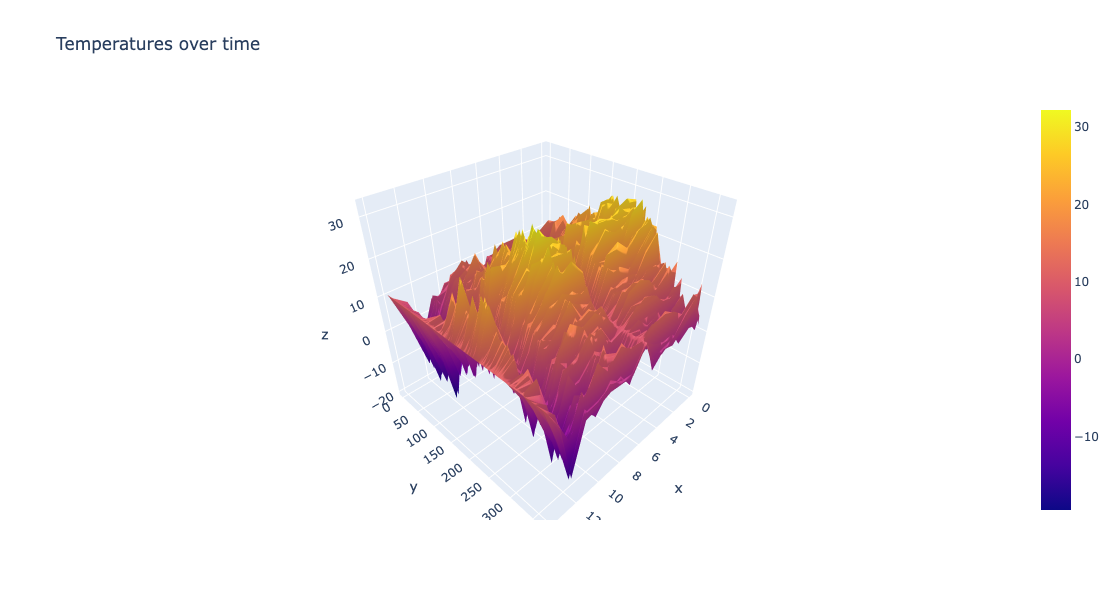

In [17]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notemp_2020.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [21]:
n_rows = df_2020.shape[0]
n_rows

366

In [23]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [25]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_2020['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) #For BASEL

In [27]:
#Check the shape of X and Y
X.shape, y.shape

((366, 2), (366, 1))

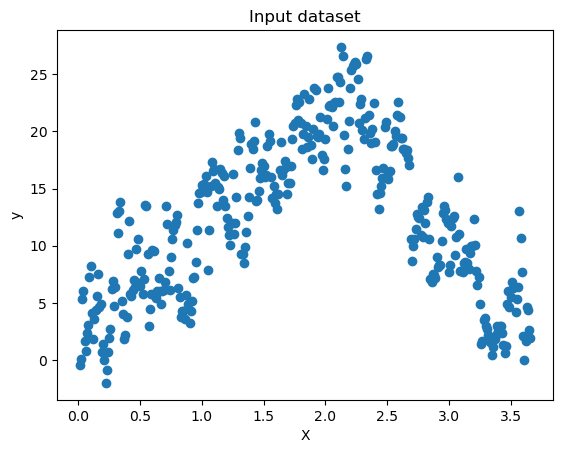

In [29]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_2020['BASEL_temp_mean']) #For BASEL
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [33]:
#what is the min temperature? 
df_2020['BASEL_temp_mean'].min()

-2.0

In [35]:
#what is the max temperature?
df_2020['BASEL_temp_mean'].max()

27.4

In [37]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [39]:
compute_cost(X,y)

array([97.20711749])

In [41]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [43]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.26 s, sys: 19.5 ms, total: 2.28 s
Wall time: 2.38 s


In [45]:
theta

array([[3.6358897 ],
       [3.72073648]])

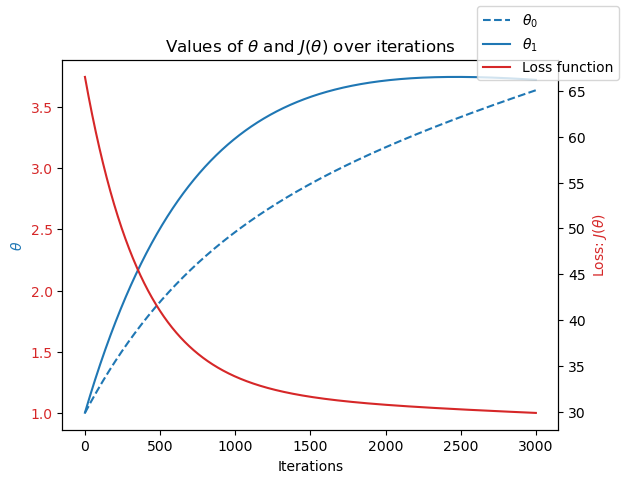

In [47]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [49]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.55 s, sys: 40.8 ms, total: 2.59 s
Wall time: 2.61 s


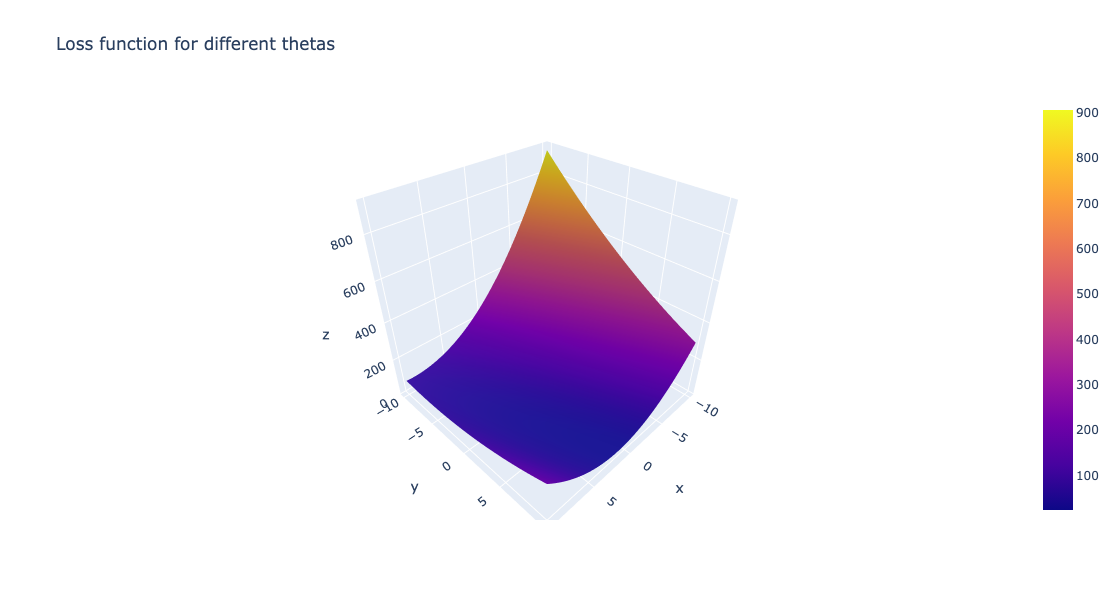

In [51]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Belgrade 2020

In [54]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_2020['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) #For BELGRADE

In [56]:
#Check the shape of X and Y
X.shape, y.shape

((366, 2), (366, 1))

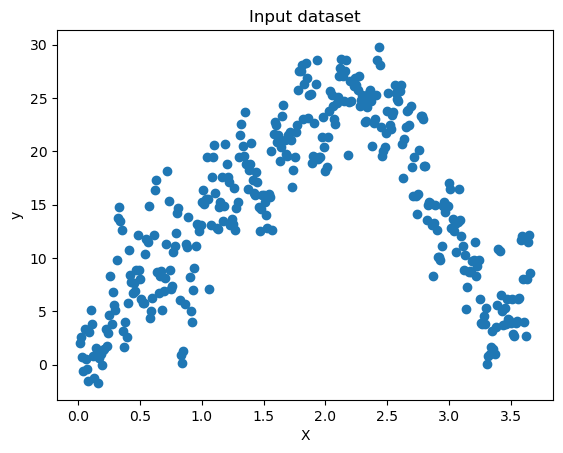

In [60]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_2020['BELGRADE_temp_mean']) #For BELGRADE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [62]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [64]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.38 s, sys: 25.8 ms, total: 2.4 s
Wall time: 2.43 s


In [66]:
theta

array([[4.07361572],
       [4.64423089]])

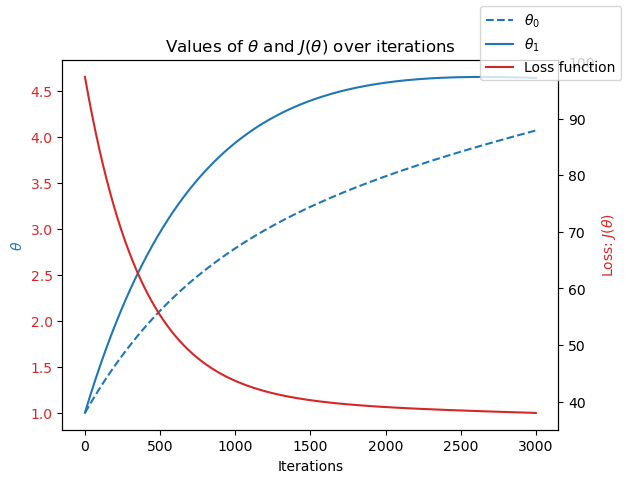

In [68]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [70]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.54 s, sys: 27.2 ms, total: 2.56 s
Wall time: 2.56 s


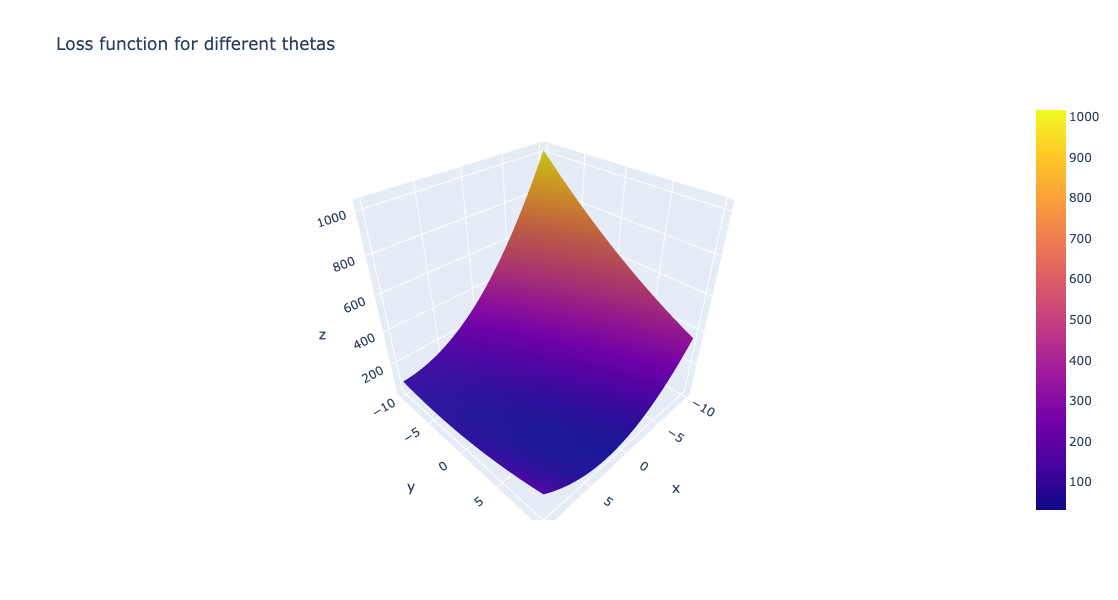

In [72]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Budapest 2020

In [75]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_2020['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #For BUDAPEST

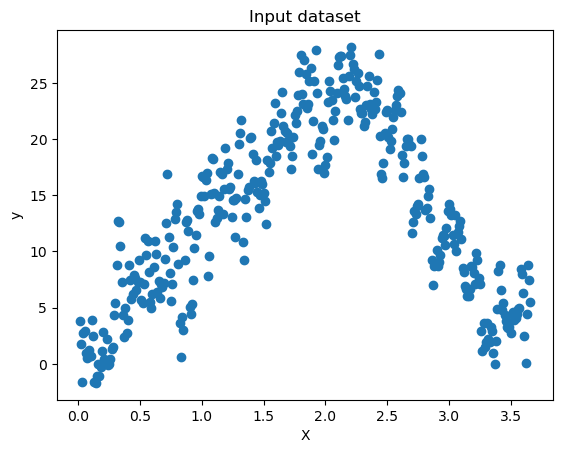

In [77]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_2020['BUDAPEST_temp_mean']) #For BUDAPEST
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [79]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [81]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations= 3000 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.00025 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2.26 s, sys: 23 ms, total: 2.28 s
Wall time: 2.39 s


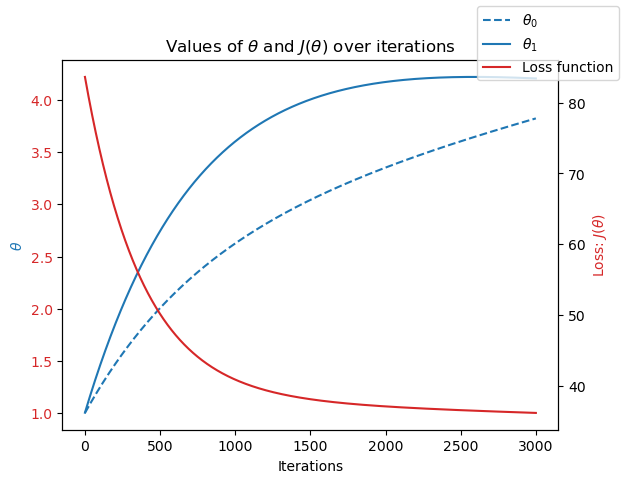

In [83]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [85]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.64 s, sys: 35.8 ms, total: 2.68 s
Wall time: 2.74 s


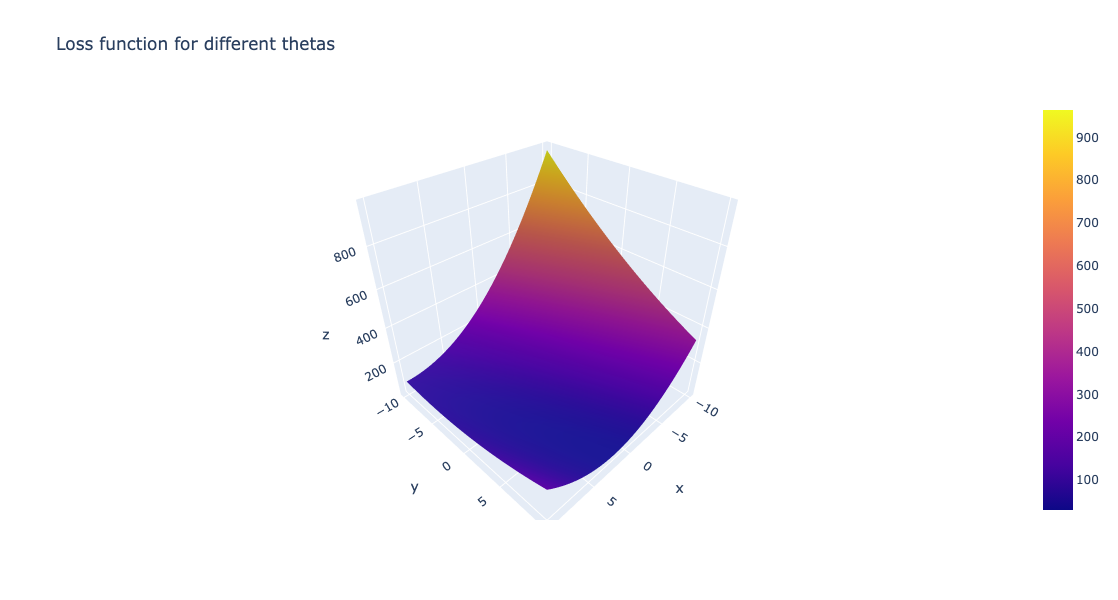

In [87]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()